In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



612

In [17]:
#Trying the code for 1 city to test if it will work
#url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="

# lat = []
# lng = []
# temp = []
# humidity =[]
# cloudiness =[]
# wind_speed = []
# country = []
# date = []

# response = requests.get(query_url + "Chicago").json()
# lat.append(response['coord']['lat'])
# lng.append(response['coord']['lon'])
# temp.append(response['main']['temp_max'])
# humidity.append(response['main']['humidity'])
# cloudiness.append(response['clouds']['all'])
# wind_speed.append(response['wind']['speed'])
# country.append(response['sys']['country'])
# date.append(response['dt'])
    
# weather_dict = {
# "Lat": lat,
# "lon": lng,
# "Temp_max": temp,
# "Humidity" : humidity,
# "Cloudiness": cloudiness,
# "Wind_speed": wind_speed,
# "Country" : country,
# "Date": date
# }
# weather_data = pd.DataFrame(weather_dict)
# weather_data.head()

,Lat,lon,Temp_max,Humidity,Cloudiness,Wind_speed,Country,Date
0,41.85,-87.65,26.35,67,75,1.34,US,1633820898


In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
name =[]
lat = []
lng = []
temp = []
humidity =[]
cloudiness =[]
wind_speed = []
country = []
date = []



for city in cities:
 
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
        print(f"Processing City : {city}")
        
    except: 
        print("City not found.Skipping.....")
     
   

    time.sleep(1)
   
    

weather_dict = {
"City" : name,
"Lat": lat,
"lon": lng,
"Temp_max": temp,
"Humidity" : humidity,
"Cloudiness": cloudiness,
"Wind_speed": wind_speed,
"Country" : country,
"Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()  

Processing City : dikson
Processing City : kavieng
Processing City : ribeira grande
Processing City : avenal
Processing City : namatanai
Processing City : tromso
Processing City : ushuaia
Processing City : mataura
Processing City : vao
Processing City : rikitea
Processing City : atuona
Processing City : sorong
Processing City : oktyabrskiy
Processing City : provideniya
Processing City : qui nhon
Processing City : constantine
Processing City : khandyga
Processing City : okhotsk
Processing City : hilo
Processing City : magadan
Processing City : castro
City not found.Skipping.....
Processing City : puerto baquerizo moreno
Processing City : albany
Processing City : buala
Processing City : alta gracia
Processing City : punta arenas
Processing City : aykhal
Processing City : hong gai
Processing City : new norfolk
Processing City : kahului
Processing City : along
Processing City : upernavik
Processing City : ngunguru
Processing City : busselton
Processing City : lorengau
Processing City : kod

Processing City : mitu
Processing City : kruisfontein
Processing City : touros
Processing City : aklavik
City not found.Skipping.....
Processing City : aktau
Processing City : eyl
Processing City : kodinsk
Processing City : fort morgan
Processing City : boysun
Processing City : beringovskiy
Processing City : vila velha
Processing City : chuy
Processing City : milkovo
Processing City : el tigre
City not found.Skipping.....
Processing City : bandarbeyla
Processing City : banjar
City not found.Skipping.....
Processing City : port lincoln
Processing City : haines junction
Processing City : hervey bay
Processing City : airai
Processing City : liverpool
Processing City : kaithal
Processing City : coari
City not found.Skipping.....
Processing City : boguchany
Processing City : seoul
City not found.Skipping.....
Processing City : la ronge
Processing City : high level
Processing City : arboletes
Processing City : beloha
Processing City : sikasso
Processing City : belaya gora
Processing City : i

Processing City : barcelos
Processing City : baherden
Processing City : brae
City not found.Skipping.....
Processing City : luanda
Processing City : xiamen
Processing City : tukrah
Processing City : mercedes
Processing City : lompoc
Processing City : statesville
Processing City : cabo san lucas
Processing City : avera
Processing City : poronaysk
Processing City : alberton
Processing City : sola


,City,Lat,lon,Temp_max,Humidity,Cloudiness,Wind_speed,Country,Date
0,Dikson,73.5069,80.5464,-0.98,58,100,10.90,RU,1633825055
1,Kavieng,-2.5744,150.7967,28.63,71,83,3.95,PG,1633824758
2,Ribeira Grande,38.5167,-28.7000,21.84,81,76,9.58,PT,1633825058
3,Avenal,36.0041,-120.1290,24.50,27,0,4.85,US,1633825059
4,Namatanai,-3.6667,152.4333,29.02,69,66,3.14,PG,1633825060


In [32]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head() 




,City,Lat,lon,Temp_max,Humidity,Cloudiness,Wind_speed,Country,Date
0,Dikson,73.5069,80.5464,-0.98,58,100,10.90,RU,1633825055
1,Kavieng,-2.5744,150.7967,28.63,71,83,3.95,PG,1633824758
2,Ribeira Grande,38.5167,-28.7000,21.84,81,76,9.58,PT,1633825058
3,Avenal,36.0041,-120.1290,24.50,27,0,4.85,US,1633825059
4,Namatanai,-3.6667,152.4333,29.02,69,66,3.14,PG,1633825060


This graph shows how the Max Temperature (C) changes according to the Latitude


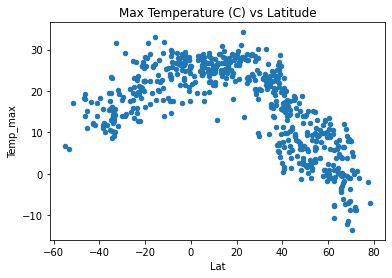

<Figure size 432x288 with 0 Axes>

In [141]:
#temperature (C) vs. Latitude
weather_data.plot.scatter("Lat", "Temp_max", title ="Max Temperature (C) vs Latitude")
print("This graph shows how the Max Temperature (C) changes according to the Latitude")
plt.show()

plt.savefig("Images/Max Temperature (C) vs Latitude.png")

This graph shows how the humidity (%) changes according to the Latitude


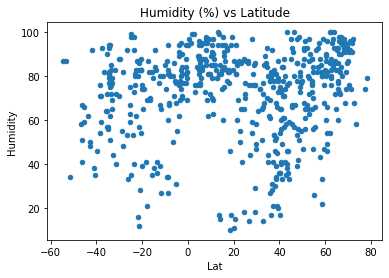

<Figure size 432x288 with 0 Axes>

In [142]:
#Humidity (%) vs. Latitude
weather_data.plot.scatter("Lat", "Humidity",title ="Humidity (%) vs Latitude" )
print("This graph shows how the humidity (%) changes according to the Latitude")
plt.show()
plt.savefig("Images/Humidity vs Latitude.png")

This graph shows how the cloudiness (%) changes according to the Latitude


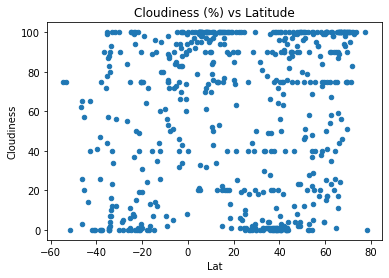

<Figure size 432x288 with 0 Axes>

In [143]:
#Cloudiness (%) vs. Latitude
weather_data.plot.scatter("Lat", "Cloudiness", title ="Cloudiness (%) vs Latitude")
print("This graph shows how the cloudiness (%) changes according to the Latitude")
plt.show()
plt.savefig("Images/Cloudiness vs Latitude.png")

This graph shows how the wind speed (kph) changes according to the Latitude


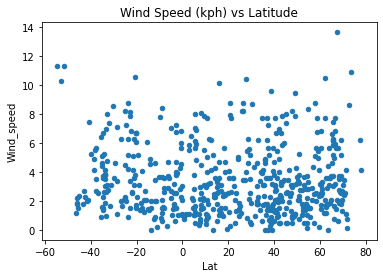

<Figure size 432x288 with 0 Axes>

In [144]:
#Wind Speed (kmph) vs. Latitude
weather_data.plot.scatter("Lat", "Wind_speed", title ="Wind Speed (kph) vs Latitude")
print("This graph shows how the wind speed (kph) changes according to the Latitude")
plt.show()
plt.savefig("Images/Wind Speed (kph) vs Latitude.png")

In [67]:
#Northern hemisphere dataframe


northern_weather = weather_data.loc[weather_data["Lat"] > 0]
northern_weather.head()

,City,Lat,lon,Temp_max,Humidity,Cloudiness,Wind_speed,Country,Date
0,Dikson,73.5069,80.5464,-0.98,58,100,10.90,RU,1633825055
2,Ribeira Grande,38.5167,-28.7000,21.84,81,76,9.58,PT,1633825058
3,Avenal,36.0041,-120.1290,24.50,27,0,4.85,US,1633825059
5,Tromsø,69.6496,18.9570,8.01,93,75,2.06,NO,1633825062
12,Oktyabr'skiy,54.4815,53.4710,6.57,84,99,1.67,RU,1633824803


The r-squared is: 0.7227135903572245
Linear regression has a negative aim and the r2 value is relatively high.
This means there is a negative corelation between the max temperature and Latitude in Northern Hemisphere 
we can use the equation to predict the max temperature of somewhere based on theri latitude


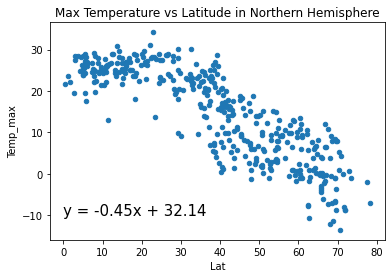

<Figure size 432x288 with 0 Axes>

In [145]:
#temperature (C) vs. Latitude in Northern Hemisphere
northern_weather.plot.scatter("Lat", "Temp_max", title="Max Temperature vs Latitude in Northern Hemisphere")
x_data= northern_weather["Lat"]
y_data = northern_weather["Temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq,(0, -10),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")
print("Linear regression has a negative aim and the r2 value is relatively high.") 
print("This means there is a negative corelation between the max temperature and Latitude in Northern Hemisphere ")
print("we can use the equation to predict the max temperature of somewhere based on theri latitude")
plt.show()
plt.savefig("Images/Max Temperature vs Latitude in Northern Hemisphere.png")

The r-squared is: 0.00015806079336117167
Linear regression and the r2 value do not show any correlation between humidity and latitude in northern hemisphere.
This means we can NOT predict the humidity of somewhere based on their latitude


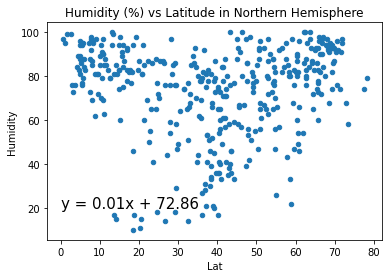

<Figure size 432x288 with 0 Axes>

In [146]:
#Humidity (%) vs. Latitude in Northern Hemisphere
northern_weather.plot.scatter("Lat", "Humidity", title="Humidity (%) vs Latitude in Northern Hemisphere")
x_data= northern_weather["Lat"]
y_data = northern_weather["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq,(0, 20),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")
print("Linear regression and the r2 value do not show any correlation between humidity and latitude in northern hemisphere.") 
print("This means we can NOT predict the humidity of somewhere based on their latitude")
plt.show()
plt.savefig("Images/Humidity vs Latitude in Northern Hemisphere.png")

The r-squared is: 1.0943696489377596e-06
Linear regression and the r2 value show that there is no correlation between cloudiness and latitude in northern hemisphere.
This means we can NOT predict the cloudiness somewhere based on their latitude


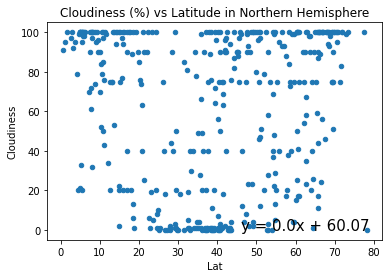

<Figure size 432x288 with 0 Axes>

In [147]:
#Cloudiness (%) vs. Latitude in Northern Hemisphere
northern_weather.plot.scatter("Lat", "Cloudiness", title="Cloudiness (%) vs Latitude in Northern Hemisphere")
x_data= northern_weather["Lat"]
y_data = northern_weather["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq,(46, 0),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

print("Linear regression and the r2 value show that there is no correlation between cloudiness and latitude in northern hemisphere.") 
print("This means we can NOT predict the cloudiness somewhere based on their latitude")
plt.show()

plt.savefig("Images/Cloudiness vs Latitude in Northern Hemisphere.png")

The r-squared is: 0.0048736403616233435
A very small r2 value shows that there is no correlation between wind speed and latitude in northern hemisphere
This means we can NOT predict the speed of wind somewhere based on their latitude


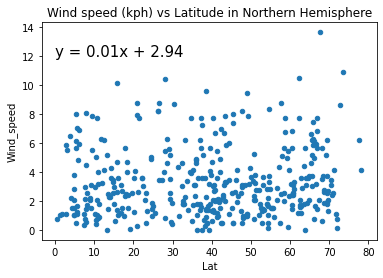

<Figure size 432x288 with 0 Axes>

In [148]:
#Wind Speed (kmph)) vs. Latitude in Northern Hemisphere
northern_weather.plot.scatter("Lat", "Wind_speed", title="Wind speed (kph) vs Latitude in Northern Hemisphere")
x_data= northern_weather["Lat"]
y_data = northern_weather["Wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq,(0, 12),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

print("A very small r2 value shows that there is no correlation between wind speed and latitude in northern hemisphere") 
print("This means we can NOT predict the speed of wind somewhere based on their latitude")

plt.show()

plt.savefig("Images/Wind speed (kph) vs Latitude in Northern Hemisphere.png")

In [87]:
#Southern hemisphere dataframe


southern_weather = weather_data.loc[weather_data["Lat"] < 0]
southern_weather.head()

,City,Lat,lon,Temp_max,Humidity,Cloudiness,Wind_speed,Country,Date
1,Kavieng,-2.5744,150.7967,28.63,71,83,3.95,PG,1633824758
4,Namatanai,-3.6667,152.4333,29.02,69,66,3.14,PG,1633825060
6,Ushuaia,-54.8000,-68.3000,6.81,87,75,11.32,AR,1633825063
7,Mataura,-46.1927,168.8643,18.04,41,26,1.81,NZ,1633825064
8,Vao,-22.6667,167.4833,21.13,62,50,6.79,NC,1633825065


The r-squared is: 0.4876136906553987
The r2 value shows that there is somewhat correlation between max temperature and latitude in southern hemisphere
The aim of the equation is positive which means there is positive correlation between these two
We can predict the max temperature of a location based on their latitude


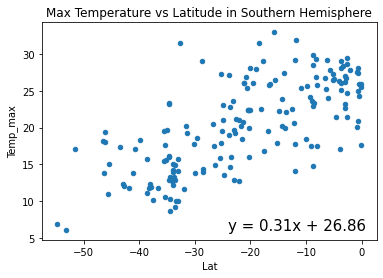

<Figure size 432x288 with 0 Axes>

In [149]:
#temperature (C) vs. Latitude in Southern Hemisphere
southern_weather.plot.scatter("Lat", "Temp_max", title="Max Temperature vs Latitude in Southern Hemisphere")
x_data= southern_weather["Lat"]
y_data = southern_weather["Temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq,(-24, 6),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

print("The r2 value shows that there is somewhat correlation between max temperature and latitude in southern hemisphere") 
print("The aim of the equation is positive which means there is positive correlation between these two")
print("We can predict the max temperature of a location based on their latitude")
plt.show()

plt.savefig("Images/Max Temperature vs Latitude in Southern Hemisphere.png")

The r-squared is: 0.026209649831629097
A small r2 value shows that there is no correlation between humidity and latitude in southern hemisphere
This means we can NOT predict the humidity of somewhere based on their latitude


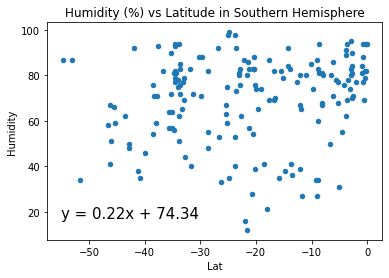

<Figure size 432x288 with 0 Axes>

In [150]:
#humidity (%) vs. Latitude in Southern Hemisphere
southern_weather.plot.scatter("Lat", "Humidity", title="Humidity (%) vs Latitude in Southern Hemisphere")
x_data= southern_weather["Lat"]
y_data = southern_weather["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq,(-55, 17),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

print("A small r2 value shows that there is no correlation between humidity and latitude in southern hemisphere") 
print("This means we can NOT predict the humidity of somewhere based on their latitude")
plt.show()

plt.savefig("Images/Humidity vs Latitude in Southern Hemisphere.png")

The r-squared is: 0.10173452074115118
A small r2 value shows that there is no correlation between cloudiness and latitude in southern hemisphere
This means we can NOT predict the cloudiness of somewhere based on their latitude


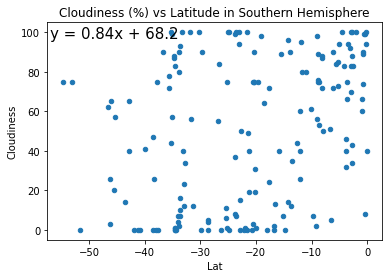

<Figure size 432x288 with 0 Axes>

In [151]:
#cloudiness (%) vs. Latitude in Southern Hemisphere
southern_weather.plot.scatter("Lat", "Cloudiness", title="Cloudiness (%) vs Latitude in Southern Hemisphere")
x_data= southern_weather["Lat"]
y_data = southern_weather["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq,(-57, 97),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

print("A small r2 value shows that there is no correlation between cloudiness and latitude in southern hemisphere") 
print("This means we can NOT predict the cloudiness of somewhere based on their latitude")
plt.show()

plt.savefig("Images/Cloudiness vs Latitude in Southern Hemisphere.png")

The r-squared is: 0.043893835533243754
A very small r2 value shows that there is no correlation between wind speed and latitude in southern hemisphere
This means we can NOT predict the wind speed of somewhere based on their latitude


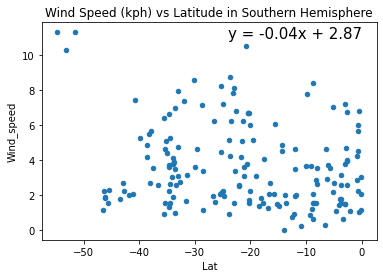

<Figure size 432x288 with 0 Axes>

In [152]:
#Wind speed (kph) vs. Latitude in Southern Hemisphere
southern_weather.plot.scatter("Lat", "Wind_speed", title="Wind Speed (kph) vs Latitude in Southern Hemisphere")
x_data= southern_weather["Lat"]
y_data = southern_weather["Wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.annotate(line_eq,(-24, 11),fontsize=15,color="black")
print(f"The r-squared is: {rvalue**2}")

print("A very small r2 value shows that there is no correlation between wind speed and latitude in southern hemisphere") 
print("This means we can NOT predict the wind speed of somewhere based on their latitude")
plt.show()

plt.savefig("Images/Wind Speed (kph) vs Latitude in Southern Hemisphere.png")

In [138]:
weather_data.to_csv('weather_data.csv')